## FD 2 layers data generator test


In [1]:
! pip install pmcx
! pip install numpy pmcx jdata bjdata matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bjdata: filename=bjdata-0.4.1-cp311-cp311-linux_x86_64.whl size=22196 sha256=5d15c00637fe2ec2e47c431360596f9a8d50c66218eeebe1429b098149766456
  Stored in directory: /root/.cache/pip/wheels/e4/d5/4a/8d5ccb70c0eb1f07a10da8548e50b7fc0cbdfd014f5eaa45c3
Successfully built bjdata


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import math
import io

Mounted at /content/drive


In [4]:
# Path to your folder containing the .py script
folder_path = '/content/drive/MyDrive/MCX_data'
sys.path.append(folder_path)
from FD_msNIRS_2layers_s2 import mcx_sim_2layers as ms2

### Read CSV and coef

In [9]:
# csv file to simulate: change the path!.
csv_path = '/content/drive/MyDrive/MCX_data/sobol_samples.csv'
df = pd.read_csv(csv_path)
# simulations save path
save_path = '/content/drive/MyDrive/MCX_data/result_folder/'

In [10]:
lambdas = [784, 800, 818, 835, 851, 868, 881, 894]
coef_path = '/content/drive/MyDrive/MCX_data/EC.xlsx'
extinction_coeffs = pd.read_excel(coef_path)

In [11]:
part_str = csv_path.split('/')[-1].replace('.csv', '').split('_')[-2] + '_' + csv_path.split('_')[-1].replace('.csv', '')
print(part_str)
# make in to be .1
df['d1'] = df['d1'].round(0)

sobol_samples


In [12]:
df.head()

,HBO1,HHB1,HBO2,HHB2,d1,a1,a2,b1,b2
0,10.618102,12.007143,46.959818,26.97317,12.0,0.889986,0.645209,1.799264,1.401673
1,18.118102,7.007143,31.959818,16.97317,17.0,2.139986,1.895209,1.049264,0.651673
2,6.868102,4.507143,39.459818,31.97317,19.0,1.514986,2.520209,0.674264,1.776673
3,14.368102,9.507143,54.459818,21.97317,14.0,2.764986,1.270209,1.424264,1.026673
4,16.243102,5.757143,35.709818,29.47317,10.0,0.577486,0.957709,1.236764,1.589173


### Generate data using package

In [13]:
first_row = df.iloc[0]
HBO1=first_row['HBO1']
HHB1=first_row['HHB1']
HBO2=first_row['HBO2']
HHB2=first_row['HHB2']
d1=first_row['d1']
a1=first_row['a1']
a2=first_row['a2']
b1=first_row['b1']
b2=first_row['b2']

In [14]:
distance_data = ms2(hbo1=HBO1, hhb1 =HHB1, hbo2=HBO2, hhb2=HHB2, l1=d1, coef_path = extinction_coeffs, a1=a1, b1=b1, a2 = a2, b2 = b2, tend=1e-08, devf=1000, nphoton=1.2e8)

nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0
tstep: 1e-11
tend: 1e-08
maxdetphoton: 1.2e+08
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 1.2e+08
tstart: 0


In [15]:
len(distance_data)

8

### data retrieve and plot

In [22]:
from FD_msNIRS_2layers_s2 import get_intensity_dynamic as gid
import matplotlib.pyplot as plt
import numpy as np
import math
lambdas_default = [784, 800, 818, 835, 851, 868, 881, 894]

In [31]:
dictt = {d:[] for d in lambdas_default}
for i in range(len(distance_data)): # 8 wavelength
    res = distance_data[i][0]
    cfg = distance_data[i][1]
    intensity_all_detectors = gid(cfg, res)
    dictt[lambdas_default[i]]= intensity_all_detectors

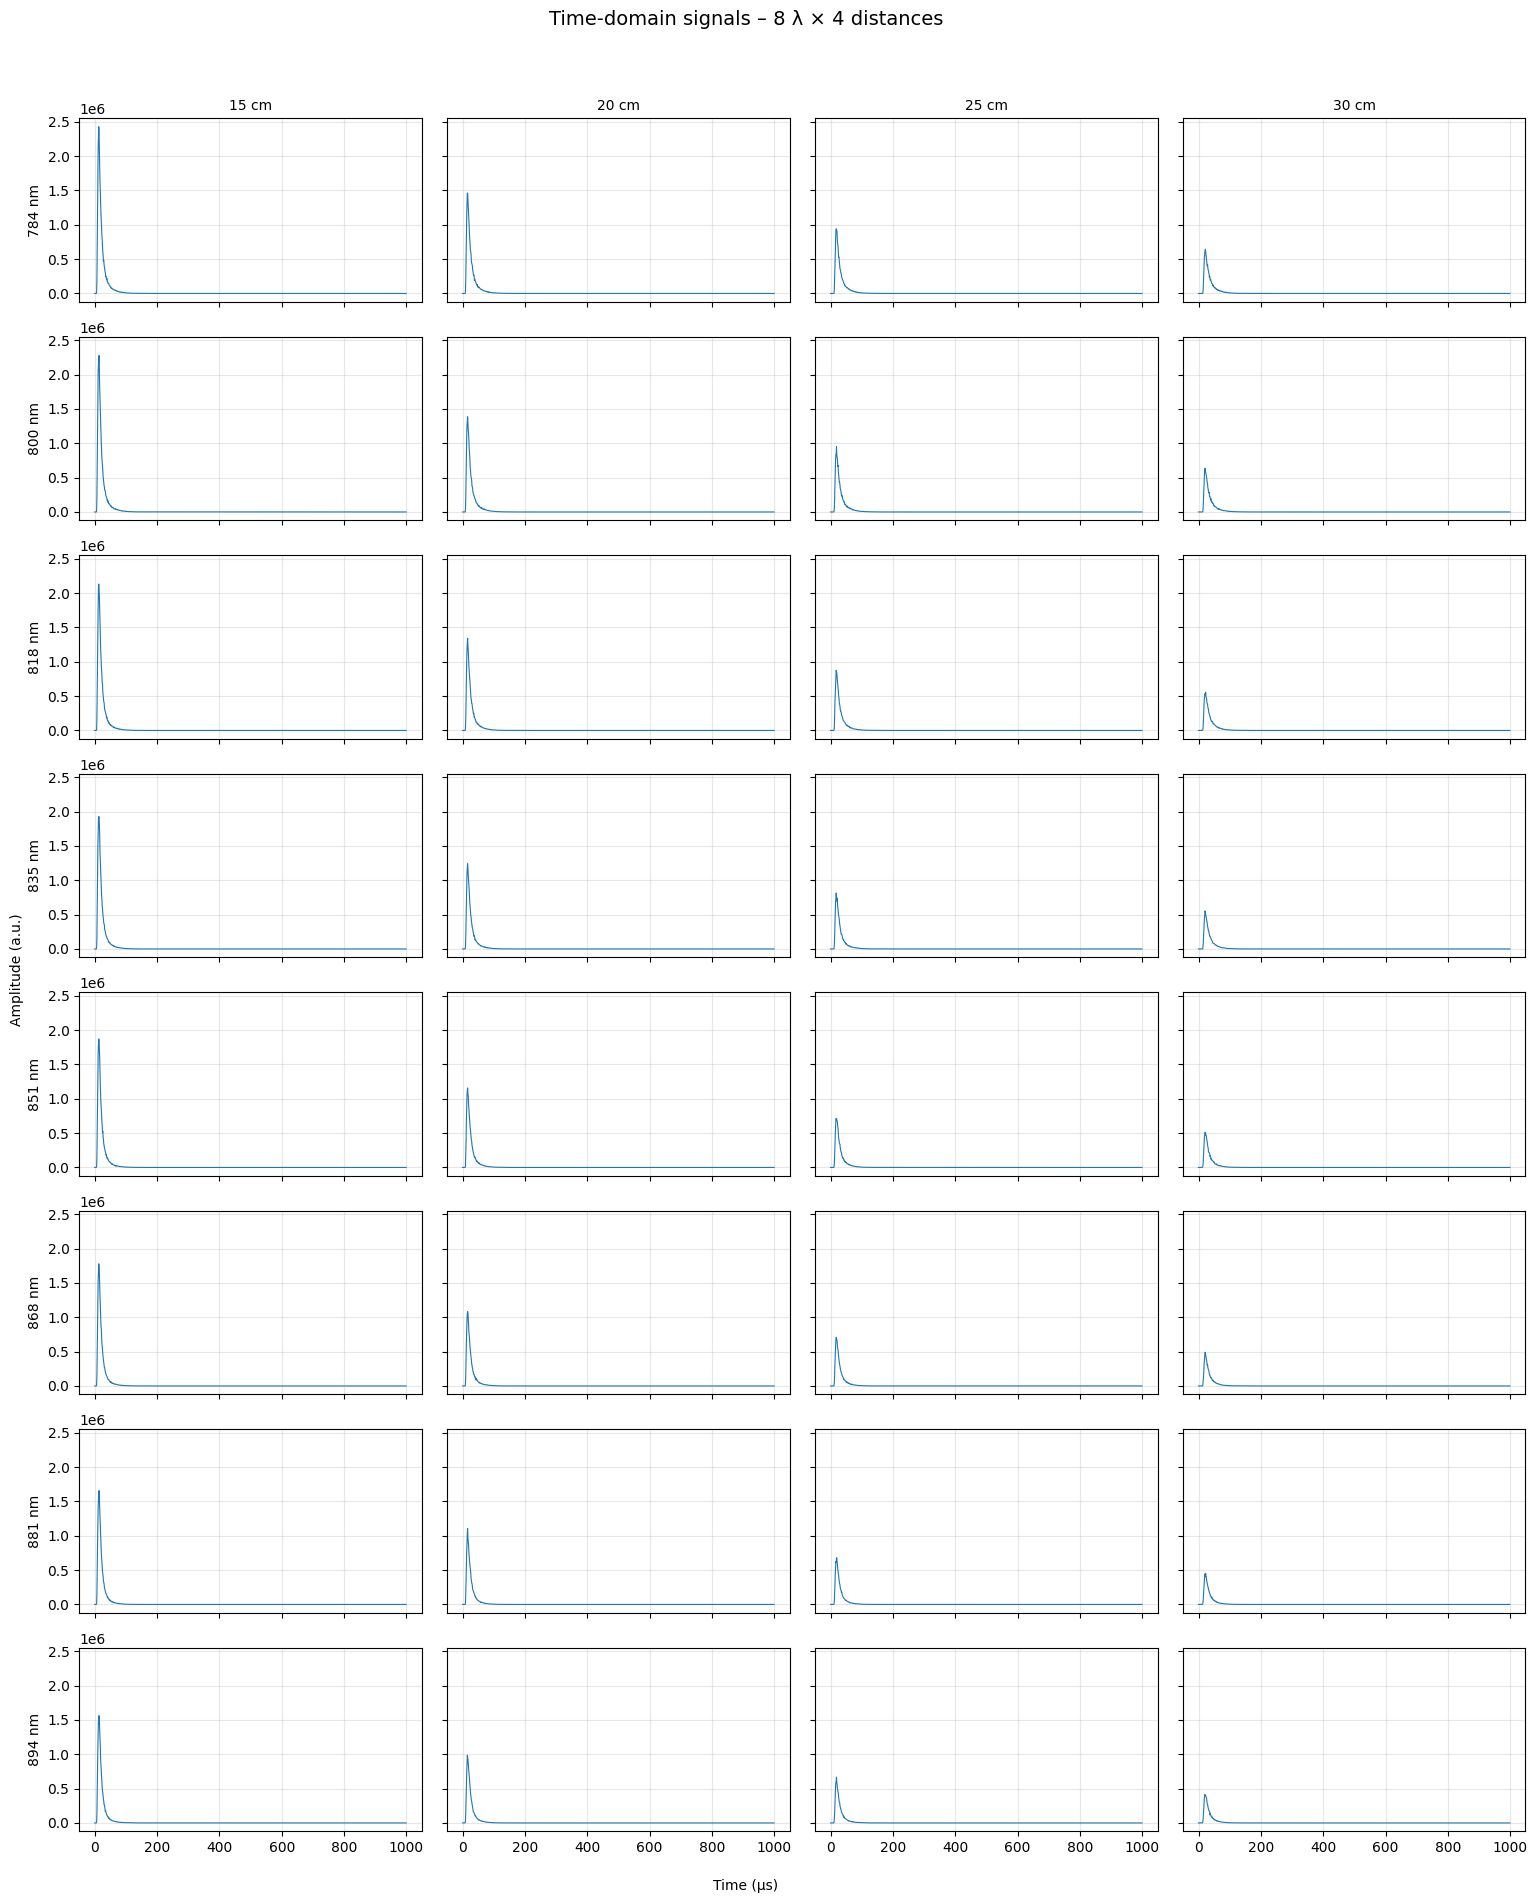

In [32]:


def plot_8x4_traces(dictt, lambdas, distances= [15, 20, 25, 30], t=None):
    """
    Parameters
    ----------
    dictt : dict
        {λ : [sig_at_ρ1, sig_at_ρ2, sig_at_ρ3, sig_at_ρ4]}
        Each signal must be 1-D and all signals equal length.
    lambdas : (8,) list or array
        Wavelengths ordered top-to-bottom in the final figure.
    distances : (4,) list or array
        Source-detector separations (or detector labels) ordered left-to-right.
    t : 1-D array or None
        Time axis, same length as each signal.  If None, sample indices are used.
    """
    if len(lambdas) != 8:
        raise ValueError("Need 8 wavelengths for 8 rows.")
    if len(distances) != 4:
        raise ValueError("Need 4 distances for 4 columns.")

    # time vector
    n_pts = len(dictt[lambdas[0]][0])
    if t is None:
        t = np.arange(n_pts)

    # figure & axes
    fig, axes = plt.subplots(8, 4, figsize=(16, 20), sharex=True, sharey=True)
    axes = axes.reshape(8, 4)          # keep 2-D indexing

    for i, lam in enumerate(lambdas):          # row index
        row_signals = dictt[lam]
        if len(row_signals) != 4:
            raise ValueError(f"Wavelength {lam} has {len(row_signals)} signals, expected 4.")
        for j, sig in enumerate(row_signals):  # column index
            ax = axes[i, j]
            ax.plot(t, sig, lw=0.8)

            # annotate
            if i == 0:
                ax.set_title(f"{distances[j]} cm", fontsize=10)
            if j == 0:
                ax.set_ylabel(f"{lam} nm", fontsize=10)
            ax.grid(alpha=0.3)

    # common labels
    fig.text(0.5, 0.04, "Time index" if t is None else "Time (µs)", ha="center")
    fig.text(0.04, 0.5, "Amplitude (a.u.)", va="center", rotation="vertical")
    fig.suptitle("Time-domain signals – 8 λ × 4 distances", fontsize=14)
    plt.tight_layout(rect=[0.05, 0.05, 1, 0.96])
    plt.show()

# ------------------------------------------------------------------
# Example call
# ------------------------------------------------------------------
plot_8x4_traces(dictt, lambdas_default)
